In [1]:
import os
import pandas as pd
from pandas.io import gbq
from google.cloud import bigquery
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "pi-iot-project.json"

# Instantiates a client
bigquery_client = bigquery.Client()

## On Line Data

In [53]:
query = '''
SELECT * FROM `pi-iot-project-235918.home.sensors` 
where sensor = "Weight"
order by time desc 
'''
# LIMIT 200

In [4]:
df = gbq.read_gbq(query, dialect='standard' );

NameError: name 'query' is not defined

In [55]:
df.head()

,device,time,sensor,val,extra
0,catfeeder,2019-07-18 10:15:00,Weight,12.0,None
1,catfeeder,2019-07-18 10:09:38,Weight,12.0,None
2,catfeeder,2019-07-18 10:04:19,Weight,12.0,None
3,catfeeder,2019-07-18 09:58:58,Weight,12.0,None
4,catfeeder,2019-07-18 09:53:35,Weight,12.0,None


In [57]:
# Save the df
df.to_csv('Weight2019_07_18.csv', index=False)

## For Offline access

In [5]:
df=pd.read_csv('Weight2019_07_18.csv')

In [6]:
df.head()

,device,time,sensor,val,extra
0,catfeeder,2019-07-18 10:15:00,Weight,12.0,NaN
1,catfeeder,2019-07-18 10:09:38,Weight,12.0,NaN
2,catfeeder,2019-07-18 10:04:19,Weight,12.0,NaN
3,catfeeder,2019-07-18 09:58:58,Weight,12.0,NaN
4,catfeeder,2019-07-18 09:53:35,Weight,12.0,NaN


In [59]:
Weight=df[df['sensor'] == 'Weight']
Weight=Weight[['time','val']]
Weight['time'] = Weight['time'].astype(str)

Weight=Weight[Weight.time > '2019-06-01']
# Weight val cleaning

Weight=Weight[Weight.val > 0]
Weight=Weight[Weight.val < 200]


In [60]:
Weight['Day']=Weight['time'].str[:10]
Weight['Hour']=Weight['time'].str[10:]              

In [61]:
Weight['Day'].min()

'2019-06-01'

In [62]:
Days=list(set(Weight['Day']))

In [63]:
Days


['2019-07-06',
 '2019-06-03',
 '2019-07-07',
 '2019-06-26',
 '2019-06-16',
 '2019-06-05',
 '2019-07-17',
 '2019-07-05',
 '2019-07-09',
 '2019-06-28',
 '2019-07-12',
 '2019-06-13',
 '2019-06-30',
 '2019-06-24',
 '2019-07-03',
 '2019-06-14',
 '2019-06-11',
 '2019-07-15',
 '2019-06-12',
 '2019-07-11',
 '2019-07-14',
 '2019-06-09',
 '2019-06-15',
 '2019-07-10',
 '2019-06-02',
 '2019-07-16',
 '2019-07-02',
 '2019-06-01',
 '2019-07-18',
 '2019-07-08',
 '2019-06-27',
 '2019-07-01',
 '2019-06-06',
 '2019-07-13',
 '2019-06-04',
 '2019-06-29',
 '2019-06-08',
 '2019-06-07',
 '2019-06-25',
 '2019-06-10',
 '2019-07-04']

### Creating new Dataframe

In [64]:
# Converting function!!

columns="time,val,Day,Hour,delta,eaten,given,eaten_cum_Day,given_cum_Day".split(',')

Days=list(set(Weight['Day']))

improved = pd.DataFrame(columns=columns)


for day in Days:
    print(day)
    temp=Weight.copy(deep=True)

    temp=Weight[temp.Day == day]
    temp = temp.sort_values(['time'])
    
    temp['delta']=0
    temp['eaten']=0
    temp['given']=0

    for i in range(1, len(temp)):
        value = temp['val'].iloc[i] - temp['val'].iloc[i-1]
        temp['delta'].iloc[i]=value
        if value < 0:
            temp['eaten'].iloc[i]= value * (-1)
        if value > 0:
            temp['given'].iloc[i]= value 
            
    
    temp['eaten_cum_Day']=temp['eaten']
    temp['given_cum_Day']=temp['given']

    for i in range(1, len(temp)):

        value = temp['eaten_cum_Day'].iloc[i-1] + temp['eaten_cum_Day'].iloc[i]
        temp['eaten_cum_Day'].iloc[i]=value

        value = temp['given_cum_Day'].iloc[i-1] + temp['given_cum_Day'].iloc[i]
        temp['given_cum_Day'].iloc[i]=value
    
    
    improved=improved.append(temp)

    

2019-07-06


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-03


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-07


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-26


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-16


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-05


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-17


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-05


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-09


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-28


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-12


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-13


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-30


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-24


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-03


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-14


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-11


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-15


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-12


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-11


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-14


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-09


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-15


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-10


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-02


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-16


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-02


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-01


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-18


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-08


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-27


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-01


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-06


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-13


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-04


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-29


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-08


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-07


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-25


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-06-10


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


2019-07-04


/Users/Enzo.Calogero/anaconda3/envs/google/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [65]:
improved.head()

,time,val,Day,Hour,delta,eaten,given,eaten_cum_Day,given_cum_Day
2589,2019-07-06 00:02:33,3.0,2019-07-06,00:02:33,0.0,0.0,0.0,0.0,0.0
2588,2019-07-06 00:08:03,3.0,2019-07-06,00:08:03,0.0,0.0,0.0,0.0,0.0
2587,2019-07-06 00:13:22,3.0,2019-07-06,00:13:22,0.0,0.0,0.0,0.0,0.0
2586,2019-07-06 00:18:41,3.0,2019-07-06,00:18:41,0.0,0.0,0.0,0.0,0.0
2585,2019-07-06 00:24:04,3.0,2019-07-06,00:24:04,0.0,0.0,0.0,0.0,0.0


In [66]:
improved.to_csv('improved.csv', index=False)


## Read off line

In [17]:
improved=pd.read_csv('improved.csv')
improved.head()

,time,val,Day,Hour,delta,eaten,given,eaten_cum_Day,given_cum_Day
0,2019-06-26 07:15:45,15.0,2019-06-26,07:15:45,0.0,0.0,0.0,0.0,0.0
1,2019-06-26 07:21:01,15.0,2019-06-26,07:21:01,0.0,0.0,0.0,0.0,0.0
2,2019-06-26 07:26:17,14.0,2019-06-26,07:26:17,-1.0,1.0,0.0,1.0,0.0
3,2019-06-26 07:31:33,14.0,2019-06-26,07:31:33,0.0,0.0,0.0,1.0,0.0
4,2019-06-26 07:36:53,14.0,2019-06-26,07:36:53,0.0,0.0,0.0,1.0,0.0


temp.plot(x='Hour', y=['eaten_cum_Day','given_cum_Day'],figsize=(12,9))

In [18]:
improved.shape

(8701, 9)

## Data quality Dataset.

In [9]:

#daily frequency
interval_min=5.3 # minutes between measurements
total_measure_daily = 60*24/interval_min

df=pd.DataFrame({'Count': improved.groupby('Day')['Hour'].count(),
                 'DailyEaten': improved.groupby('Day')['eaten_cum_Day'].max(),
                 'DailyGiven': improved.groupby('Day')['given_cum_Day'].max(),
                 
                      'Massimo': improved.groupby('Day')['Hour'].max(),
                      'Minimo': improved.groupby('Day')['Hour'].min(),
                      'CoverRatio': improved.groupby('Day')['Hour'].count() / total_measure_daily
                     })
#Dataquality['Day']=Dataquality.index
df = df.reset_index()

In [10]:
df.head()

,Day,Count,DailyEaten,DailyGiven,Massimo,Minimo,CoverRatio
0,2019-06-01,170,60.0,63.0,23:06:08,08:03:29,0.625694
1,2019-06-02,181,42.0,48.0,23:48:14,07:42:47,0.666181
2,2019-06-03,196,113.0,102.0,23:58:11,06:33:12,0.721389
3,2019-06-04,259,81.0,108.0,22:59:23,00:03:27,0.953264
4,2019-06-05,182,79.0,64.0,23:26:10,07:20:58,0.669861


In [11]:
df['Date'] = pd.to_datetime(df.Day, infer_datetime_format=True)
df.head()

,Day,Count,DailyEaten,DailyGiven,Massimo,Minimo,CoverRatio,Date
0,2019-06-01,170,60.0,63.0,23:06:08,08:03:29,0.625694,2019-06-01
1,2019-06-02,181,42.0,48.0,23:48:14,07:42:47,0.666181,2019-06-02
2,2019-06-03,196,113.0,102.0,23:58:11,06:33:12,0.721389,2019-06-03
3,2019-06-04,259,81.0,108.0,22:59:23,00:03:27,0.953264,2019-06-04
4,2019-06-05,182,79.0,64.0,23:26:10,07:20:58,0.669861,2019-06-05


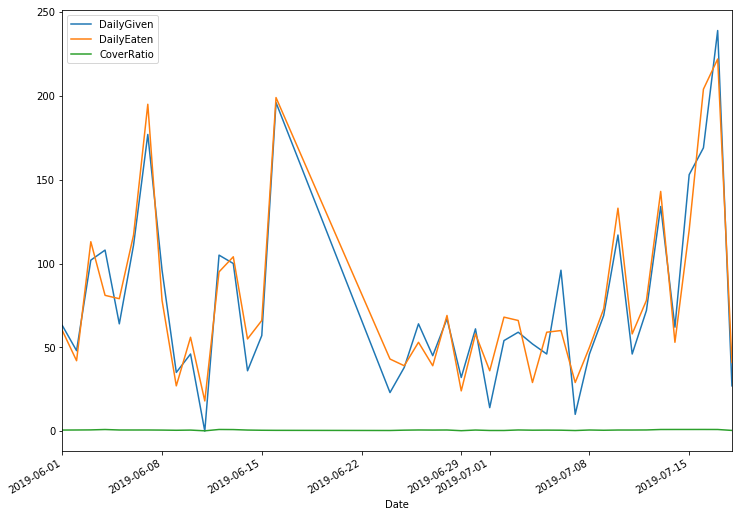

In [12]:
df.plot(x='Date', y=['DailyGiven','DailyEaten','CoverRatio'],figsize=(12,9))

In [14]:
df.tail(20)

,Day,Count,DailyEaten,DailyGiven,Massimo,Minimo,CoverRatio,Date
21,2019-06-29,69,24.0,32.0,23:08:04,16:59:50,0.253958,2019-06-29
22,2019-06-30,173,58.0,61.0,22:03:54,06:25:19,0.636736,2019-06-30
23,2019-07-01,102,36.0,14.0,15:45:49,06:20:23,0.375417,2019-07-01
24,2019-07-02,101,68.0,54.0,23:29:57,14:31:24,0.371736,2019-07-02
25,2019-07-03,186,66.0,59.0,22:44:49,05:50:39,0.684583,2019-07-03
26,2019-07-04,150,29.0,52.0,23:57:26,07:26:21,0.552083,2019-07-04
27,2019-07-05,161,59.0,46.0,23:57:11,09:33:44,0.592569,2019-07-05
28,2019-07-06,149,60.0,96.0,23:17:20,00:02:33,0.548403,2019-07-06
29,2019-07-07,95,29.0,10.0,23:39:46,15:18:37,0.349653,2019-07-07
30,2019-07-08,180,50.0,46.0,23:53:13,07:47:44,0.662500,2019-07-08
